In [1]:
import numpy as np
with open("energy_tz_ref.dat", "r") as f:
    tz_data = f.read()

tz_tmo = {}
tz_atom = {}
tmos = []
atoms = []
for lines in tz_data.splitlines():
    if lines.startswith('#') or len(lines) == 0:
        continue
    else:
        parts = lines.split()
        tmo = parts[0]
        if 'O' in tmo and len(tmo) > 1:
            tmos = np.hstack((tmos,tmo))
            tz_tmo[tmo] = {}
            tz_tmo[tmo]['hf'] = float(parts[1]) - float(parts[1])
            tz_tmo[tmo]['ref'] = float(parts[-1]) - float(parts[1])
            tz_tmo[tmo]['ccsd'] = float(parts[2]) - float(parts[1])
            tz_tmo[tmo]['ccsd_t'] = float(parts[3]) - float(parts[1])
            tz_tmo[tmo]['afqmc_hf'] = float(parts[4]) - float(parts[1])
            tz_tmo[tmo]['afqmc_hf_err'] = float(parts[6])
            tz_tmo[tmo]['afqmc_cisd'] = float(parts[7]) - float(parts[1])
            tz_tmo[tmo]['afqmc_cisd_err'] = float(parts[9])
            tz_tmo[tmo]['afqmc_ccpt'] = float(parts[10]) - float(parts[1])
            tz_tmo[tmo]['afqmc_ccpt_err'] = float(parts[12])
            tz_tmo[tmo]['afqmc_ccpt2'] = float(parts[13]) - float(parts[1])
            tz_tmo[tmo]['afqmc_ccpt2_err'] = float(parts[15])
        else:
            atoms = np.hstack((atoms,tmo))
            tz_atom[tmo] = {}
            tz_atom[tmo]['hf'] = float(parts[1]) - float(parts[1])
            tz_atom[tmo]['ref'] = float(parts[-1]) - float(parts[1])
            tz_atom[tmo]['ccsd'] = float(parts[2]) - float(parts[1])
            tz_atom[tmo]['ccsd_t'] = float(parts[3]) - float(parts[1])
            tz_atom[tmo]['afqmc_hf'] = float(parts[4]) - float(parts[1])
            tz_atom[tmo]['afqmc_hf_err'] = float(parts[6])
            tz_atom[tmo]['afqmc_cisd'] = float(parts[7]) - float(parts[1])
            tz_atom[tmo]['afqmc_cisd_err'] = float(parts[9])
            tz_atom[tmo]['afqmc_ccpt'] = float(parts[10]) - float(parts[1])
            tz_atom[tmo]['afqmc_ccpt_err'] = float(parts[12])
            tz_atom[tmo]['afqmc_ccpt2'] = float(parts[13]) - float(parts[1])
            tz_atom[tmo]['afqmc_ccpt2_err'] = float(parts[15])
print(tmos)
print(atoms)

['CrO' 'CuO' 'FeO' 'MnO' 'ScO' 'TiO' 'VO']
['Cr' 'Cu' 'Fe' 'Mn' 'Sc' 'Ti' 'V' 'O']


In [2]:
import re
def parse_formula(formula):
    pattern = r"([A-Z][a-z]?)(\d*)"
    counts = {}
    for (element, count) in re.findall(pattern, formula):
        count = int(count) if count else 1
        counts[element] = counts.get(element, 0) + count
    return counts

In [15]:
def get_sum_atom_energy(tmos,atom_dict):
    sum_atom_energy = {}
    for mol in tmos:
        sum_atom_energy[mol] = {}
        formula = parse_formula(mol)
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["ref"] * count
        sum_atom_energy[mol]['ref'] = energy
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["hf"] * count
        sum_atom_energy[mol]['hf'] = energy
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["afqmc_hf"] * count
        sum_atom_energy[mol]['afqmc_hf'] = energy
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["afqmc_cisd"] * count
        sum_atom_energy[mol]['afqmc_cisd'] = energy
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["afqmc_ccpt"] * count
        sum_atom_energy[mol]['afqmc_ccpt'] = energy
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["afqmc_ccpt2"] * count
        sum_atom_energy[mol]['afqmc_ccpt2'] = energy
        energy = 0
        for atom,count in formula.items():
            if "H" == atom:
                energy += atom_dict[atom]* count
            else:
                energy += atom_dict[atom]["ccsd_t"] * count
        sum_atom_energy[mol]['ccsd_t'] = energy

    return sum_atom_energy

In [16]:
tz_sum_atom_energy = get_sum_atom_energy(tmos,tz_atom)

In [17]:
tz_ref = []
# tz_hf = []
tz_ccsd_t = []
tz_afqmc_hf = []
tz_afqmc_cisd = []
tz_afqmc_ccpt = [] 
tz_afqmc_ccpt2 = []
for mol in tmos:
    tz_ref = np.hstack((tz_ref,tz_sum_atom_energy[mol]['ref']-tz_tmo[mol]['ref']))
    # tz_hf = np.hstack((tz_hf,tz_sum_atom_energy[mol]['hf']-tz_tmo[mol]['hf']))
    tz_ccsd_t = np.hstack((tz_ccsd_t,tz_sum_atom_energy[mol]['ccsd_t']-tz_tmo[mol]['ccsd_t']))
    tz_afqmc_hf = np.hstack((tz_afqmc_hf,tz_sum_atom_energy[mol]['afqmc_hf']-tz_tmo[mol]['afqmc_hf']))
    tz_afqmc_cisd = np.hstack((tz_afqmc_cisd,tz_sum_atom_energy[mol]['afqmc_cisd']-tz_tmo[mol]['afqmc_cisd']))
    tz_afqmc_ccpt = np.hstack((tz_afqmc_ccpt,tz_sum_atom_energy[mol]['afqmc_ccpt']-tz_tmo[mol]['afqmc_ccpt']))
    tz_afqmc_ccpt2 = np.hstack((tz_afqmc_ccpt2,tz_sum_atom_energy[mol]['afqmc_ccpt2']-tz_tmo[mol]['afqmc_ccpt2']))

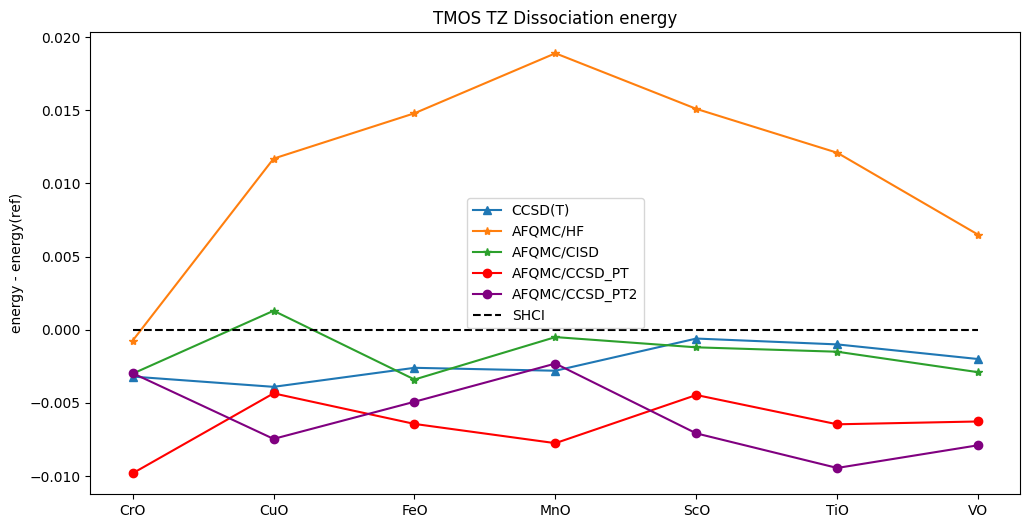

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(tmos,tz_ccsd_t-tz_ref,'^-',label='CCSD(T)')
plt.plot(tmos,tz_afqmc_hf-tz_ref,'*-',label='AFQMC/HF')
plt.plot(tmos,tz_afqmc_cisd-tz_ref,'*-',label='AFQMC/CISD')
plt.plot(tmos,tz_afqmc_ccpt-tz_ref,'o-',color='red',label='AFQMC/CCSD_PT')
plt.plot(tmos,tz_afqmc_ccpt2-tz_ref,'o-',color='purple',label='AFQMC/CCSD_PT2')
plt.plot(tmos,[0]*len(tmos),'--',color='black',label='SHCI')
# plt.xlabel('')
plt.ylabel('energy - energy(ref)')
plt.title('TMOS TZ Dissociation energy')
plt.legend()
plt.show()

In [20]:
with open("energy_qz_ref.dat", "r") as f:
    qz_data = f.read()

qz_tmo = {}
qz_atom = {}
tmos = []
atoms = []
for lines in qz_data.splitlines():
    if lines.startswith('#') or len(lines) == 0:
        continue
    else:
        parts = lines.split()
        tmo = parts[0]
        if 'O' in tmo and len(tmo) > 1:
            tmos = np.hstack((tmos,tmo))
            qz_tmo[tmo] = {}
            qz_tmo[tmo]['ref'] = float(parts[-1]) - float(parts[1])
            qz_tmo[tmo]['hf'] = float(parts[1])  - float(parts[1])
            qz_tmo[tmo]['ccsd'] = float(parts[2]) - float(parts[1])
            qz_tmo[tmo]['ccsd_t'] = float(parts[3]) - float(parts[1])
            qz_tmo[tmo]['afqmc_hf'] = float(parts[4]) - float(parts[1])
            qz_tmo[tmo]['afqmc_hf_err'] = float(parts[6])
            qz_tmo[tmo]['afqmc_cisd'] = float(parts[7]) - float(parts[1])
            qz_tmo[tmo]['afqmc_cisd_err'] = float(parts[9])
            qz_tmo[tmo]['afqmc_ccpt'] = float(parts[10]) - float(parts[1])
            qz_tmo[tmo]['afqmc_ccpt_err'] = float(parts[12])
            qz_tmo[tmo]['afqmc_ccpt2'] = float(parts[13]) - float(parts[1])
            qz_tmo[tmo]['afqmc_ccpt2_err'] = float(parts[15])
        else:
            atoms = np.hstack((atoms,tmo))
            qz_atom[tmo] = {}
            qz_atom[tmo]['ref'] = float(parts[-1]) - float(parts[1])
            qz_atom[tmo]['hf'] = float(parts[1]) - float(parts[1])
            qz_atom[tmo]['ccsd'] = float(parts[2]) - float(parts[1])
            qz_atom[tmo]['ccsd_t'] = float(parts[3]) - float(parts[1])
            qz_atom[tmo]['afqmc_hf'] = float(parts[4]) - float(parts[1])
            qz_atom[tmo]['afqmc_hf_err'] = float(parts[6])
            qz_atom[tmo]['afqmc_cisd'] = float(parts[7]) - float(parts[1])
            qz_atom[tmo]['afqmc_cisd_err'] = float(parts[9])
            qz_atom[tmo]['afqmc_ccpt'] = float(parts[10]) - float(parts[1])
            qz_atom[tmo]['afqmc_ccpt_err'] = float(parts[12])
            qz_atom[tmo]['afqmc_ccpt2'] = float(parts[13]) - float(parts[1])
            qz_atom[tmo]['afqmc_ccpt2_err'] = float(parts[15])
print(tmos)
print(atoms)

['CrO' 'CuO' 'FeO' 'MnO' 'ScO' 'TiO' 'VO']
['Cr' 'Cu' 'Fe' 'Mn' 'Sc' 'Ti' 'V' 'O']


In [21]:
qz_sum_atom_energy = get_sum_atom_energy(tmos,qz_atom)

In [22]:
qz_ref = []
qz_hf = []
qz_ccsd_t = []
qz_afqmc_hf = []
qz_afqmc_cisd = []
qz_afqmc_ccpt = []
qz_afqmc_ccpt2 = []
for mol in tmos:
    qz_ref = np.hstack((qz_ref,qz_sum_atom_energy[mol]['ref']-qz_tmo[mol]['ref']))
    qz_hf = np.hstack((qz_hf,qz_sum_atom_energy[mol]['hf']-qz_tmo[mol]['hf']))
    qz_ccsd_t = np.hstack((qz_ccsd_t,qz_sum_atom_energy[mol]['ccsd_t']-qz_tmo[mol]['ccsd_t']))
    qz_afqmc_hf = np.hstack((qz_afqmc_hf,qz_sum_atom_energy[mol]['afqmc_hf']-qz_tmo[mol]['afqmc_hf']))
    qz_afqmc_cisd = np.hstack((qz_afqmc_cisd,qz_sum_atom_energy[mol]['afqmc_cisd']-qz_tmo[mol]['afqmc_cisd']))
    qz_afqmc_ccpt = np.hstack((qz_afqmc_ccpt,qz_sum_atom_energy[mol]['afqmc_ccpt']-qz_tmo[mol]['afqmc_ccpt']))
    qz_afqmc_ccpt2 = np.hstack((qz_afqmc_ccpt2,qz_sum_atom_energy[mol]['afqmc_ccpt2']-qz_tmo[mol]['afqmc_ccpt2']))

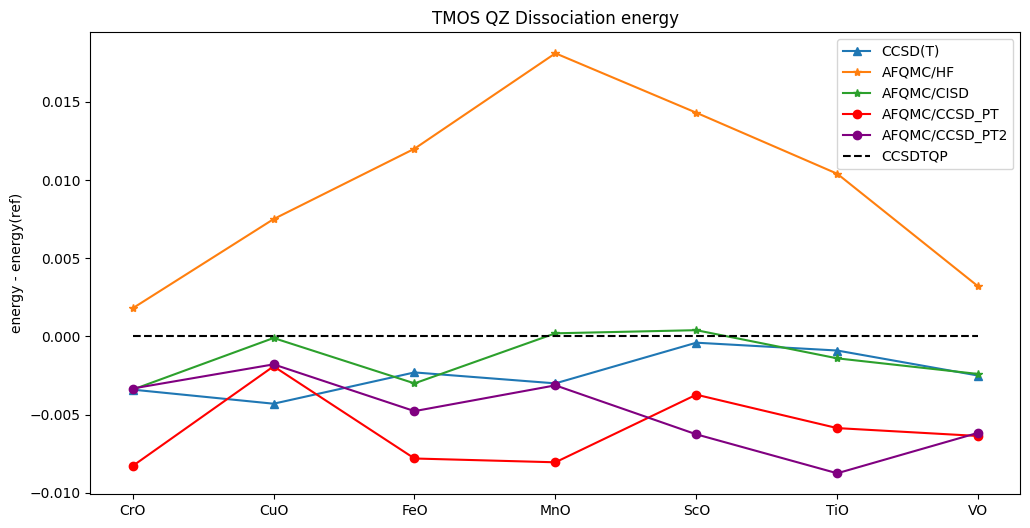

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(tmos,qz_ccsd_t-qz_ref,'^-',label='CCSD(T)')
plt.plot(tmos,qz_afqmc_hf-qz_ref,'*-',label='AFQMC/HF')
plt.plot(tmos,qz_afqmc_cisd-qz_ref,'*-',label='AFQMC/CISD')
plt.plot(tmos,qz_afqmc_ccpt-qz_ref,'o-',color='red',label='AFQMC/CCSD_PT')
plt.plot(tmos,qz_afqmc_ccpt2-qz_ref,'o-',color='purple',label='AFQMC/CCSD_PT2')
plt.plot(tmos,[0]*len(tmos),'--',color='black',label='CCSDTQP')
# plt.xlabel('')
plt.ylabel('energy - energy(ref)')
plt.title('TMOS QZ Dissociation energy')
plt.legend()
plt.show()

In [24]:
# E_corr = k*n^(-3) + b
def extraplote34(e_corr_tz,e_corr_qz):
    n_tz, n_qz = 3**(-3), 4**(-3)
    k = (e_corr_qz - e_corr_tz) / (n_qz - n_tz)
    e_corr_ext = e_corr_tz - k * n_tz
    return e_corr_ext

In [25]:
ext_tmo = {}
ext_atom = {}
for mol in tmos:
    ext_tmo[mol] = {}
    ext_tmo[mol]['ref'] = extraplote34(tz_tmo[mol]['ref'],qz_tmo[mol]['ref'])
    ext_tmo[mol]['ccsd_t'] = extraplote34(tz_tmo[mol]['ccsd_t'],qz_tmo[mol]['ccsd_t'])
    ext_tmo[mol]['afqmc_hf'] = extraplote34(tz_tmo[mol]['afqmc_hf'],qz_tmo[mol]['afqmc_hf'])
    ext_tmo[mol]['afqmc_cisd'] = extraplote34(tz_tmo[mol]['afqmc_cisd'],qz_tmo[mol]['afqmc_cisd'])
    ext_tmo[mol]['afqmc_ccpt'] = extraplote34(tz_tmo[mol]['afqmc_ccpt'],qz_tmo[mol]['afqmc_ccpt'])
    ext_tmo[mol]['afqmc_ccpt2'] = extraplote34(tz_tmo[mol]['afqmc_ccpt2'],qz_tmo[mol]['afqmc_ccpt2'])
for mol in atoms:
    ext_atom[mol] = {}
    ext_atom[mol]['ref'] = extraplote34(tz_atom[mol]['ref'],qz_atom[mol]['ref'])
    ext_atom[mol]['ccsd_t'] = extraplote34(tz_atom[mol]['ccsd_t'],qz_atom[mol]['ccsd_t'])
    ext_atom[mol]['afqmc_hf'] = extraplote34(tz_atom[mol]['afqmc_hf'],qz_atom[mol]['afqmc_hf'])
    ext_atom[mol]['afqmc_cisd'] = extraplote34(tz_atom[mol]['afqmc_cisd'],qz_atom[mol]['afqmc_cisd'])
    ext_atom[mol]['afqmc_ccpt'] = extraplote34(tz_atom[mol]['afqmc_ccpt'],qz_atom[mol]['afqmc_ccpt'])
    ext_atom[mol]['afqmc_ccpt2'] = extraplote34(tz_atom[mol]['afqmc_ccpt2'],qz_atom[mol]['afqmc_ccpt2'])
print(tmos)
print(atoms)

['CrO' 'CuO' 'FeO' 'MnO' 'ScO' 'TiO' 'VO']
['Cr' 'Cu' 'Fe' 'Mn' 'Sc' 'Ti' 'V' 'O']


In [27]:
ext_sum_atom_energy = {}
for mol in tmos:
    ext_sum_atom_energy[mol] = {}
    formula = parse_formula(mol)
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += ext_atom[atom]* count
        else:
            energy += ext_atom[atom]["ref"] * count
    ext_sum_atom_energy[mol]['ref'] = energy
    energy = 0
    # for atom,count in formula.items():
    #     if "H" == atom:
    #         energy += ext_atom[atom]* count
    #     else:
    #         energy += ext_atom[atom]["hf"] * count
    # ext_sum_atom_energy[mol]['hf'] = energy
    # energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += ext_atom[atom]* count
        else:
            energy += ext_atom[atom]["afqmc_hf"] * count
    ext_sum_atom_energy[mol]['afqmc_hf'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += ext_atom[atom]* count
        else:
            energy += ext_atom[atom]["afqmc_cisd"] * count
    ext_sum_atom_energy[mol]['afqmc_cisd'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += ext_atom[atom]* count
        else:
            energy += ext_atom[atom]["afqmc_ccpt"] * count
    ext_sum_atom_energy[mol]['afqmc_ccpt'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += ext_atom[atom]* count
        else:
            energy += ext_atom[atom]["afqmc_ccpt2"] * count
    ext_sum_atom_energy[mol]['afqmc_ccpt2'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += ext_atom[atom]* count
        else:
            energy += ext_atom[atom]["ccsd_t"] * count
    ext_sum_atom_energy[mol]['ccsd_t'] = energy

In [28]:
ext_ref = []
ext_hf = []
ext_ccsd_t = []
ext_afqmc_hf = []
ext_afqmc_cisd = []
ext_afqmc_ccpt = []
ext_afqmc_ccpt2 = []
tmos = ['ScO', 'TiO', 'VO', 'CrO', 'MnO', 'FeO', 'CuO']
for mol in tmos:
    ext_ref = np.hstack((ext_ref,ext_sum_atom_energy[mol]['ref']-ext_tmo[mol]['ref']))
    # ext_hf = np.hstack((ext_hf,ext_sum_atom_energy[mol]['hf']-ext_tmo[mol]['hf']))
    ext_ccsd_t = np.hstack((ext_ccsd_t,ext_sum_atom_energy[mol]['ccsd_t']-ext_tmo[mol]['ccsd_t']))
    ext_afqmc_hf = np.hstack((ext_afqmc_hf,ext_sum_atom_energy[mol]['afqmc_hf']-ext_tmo[mol]['afqmc_hf']))
    ext_afqmc_cisd = np.hstack((ext_afqmc_cisd,ext_sum_atom_energy[mol]['afqmc_cisd']-ext_tmo[mol]['afqmc_cisd']))
    ext_afqmc_ccpt = np.hstack((ext_afqmc_ccpt,ext_sum_atom_energy[mol]['afqmc_ccpt']-ext_tmo[mol]['afqmc_ccpt']))
    ext_afqmc_ccpt2 = np.hstack((ext_afqmc_ccpt2,ext_sum_atom_energy[mol]['afqmc_ccpt2']-ext_tmo[mol]['afqmc_ccpt2']))

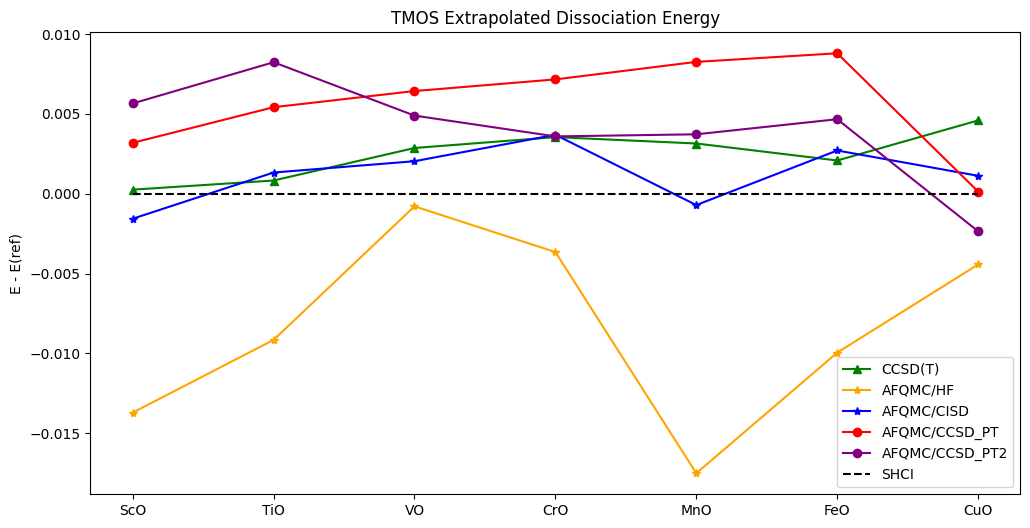

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(tmos,-ext_ccsd_t+ext_ref,'^-',color='green',label='CCSD(T)')
plt.plot(tmos,-ext_afqmc_hf+ext_ref,'*-',color='orange',label='AFQMC/HF')
plt.plot(tmos,-ext_afqmc_cisd+ext_ref,'*-',color='blue',label='AFQMC/CISD')
plt.plot(tmos,-ext_afqmc_ccpt+ext_ref,'o-',color='red',label='AFQMC/CCSD_PT')
plt.plot(tmos,-ext_afqmc_ccpt2+ext_ref,'o-',color='purple',label='AFQMC/CCSD_PT2')
plt.plot(tmos,[0]*len(tmos),'--',color='black',label='SHCI')
# plt.xlabel('')
plt.ylabel('E - E(ref)')
plt.title('TMOS Extrapolated Dissociation Energy')
plt.legend()
plt.show()

In [30]:
import numpy as np
ccsd_t_msd = np.sqrt(np.sum((-ext_ccsd_t+ext_ref)**2))
afqmc_hf_msd = np.sqrt(np.sum((-ext_afqmc_hf+ext_ref)**2))
afqmc_cisd_msd = np.sqrt(np.sum((-ext_afqmc_cisd+ext_ref)**2))
afqmc_ccsd_pt_msd = np.sqrt(np.sum((-ext_afqmc_ccpt+ext_ref)**2))
afqmc_ccsd_pt2_msd = np.sqrt(np.sum((-ext_afqmc_ccpt2+ext_ref)**2))
print('TMOs DATA')
print(f'CCSD(T) MSD from Ref {1000*ccsd_t_msd:.2f} mHa')
print(f'AFQMC/HF MSD from Ref {1000*afqmc_hf_msd:.2f} mHa')
print(f'AFQMC/CISD MSD from Ref {1000*afqmc_cisd_msd:.2f} mHa')
print(f'AFQMC/CCSD_PT MSD from Ref {1000*afqmc_ccsd_pt_msd:.2f} mHa')
print(f'AFQMC/CCSD_PT2 from Ref {1000*afqmc_ccsd_pt2_msd:.2f} mHa')

TMOs DATA
CCSD(T) MSD from Ref 7.54 mHa
AFQMC/HF MSD from Ref 26.68 mHa
AFQMC/CISD MSD from Ref 5.58 mHa
AFQMC/CCSD_PT MSD from Ref 16.67 mHa
AFQMC/CCSD_PT2 from Ref 13.34 mHa


In [ ]:
# TiO TZ
# UCCSD converged
# E(UCCSD) = -73.98485334595874  E_corr = -0.7032029311851392
# CCD energy :  -73.98717171958093
# CCSD energy :  -73.98485334595874

# ScO TZ
# UCCSD converged
# E(UCCSD) = -62.48950346494986  E_corr = -0.6552865636804972
# CCD energy :  -62.49223630637173
# CCSD energy :  -62.489503464949856